In [0]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import random 
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical 

In [0]:
(xtr,ytr),(xts,yts)=mnist.load_data()


In [3]:
print(xtr.shape)
print(ytr.shape)

(60000, 28, 28)
(60000,)


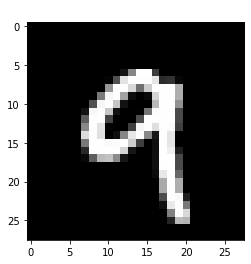

In [4]:
plt.imshow(xtr[110],cmap='gray')
plt.title(ytr[110],color='w')
plt.show()

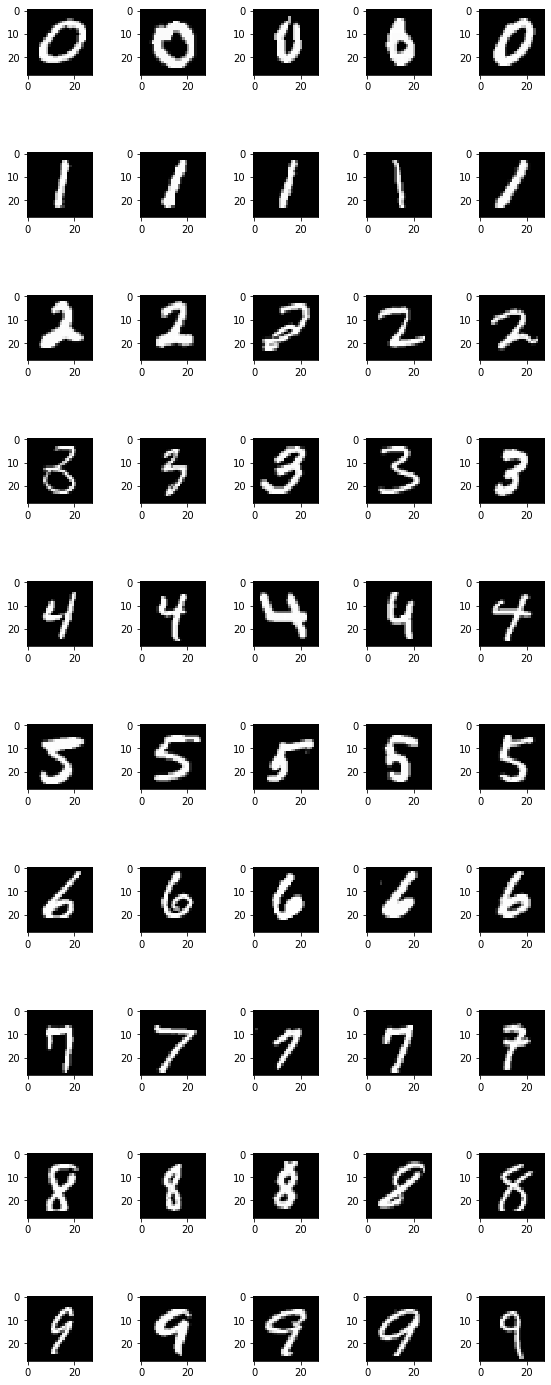

In [5]:
n_classes=10
n_cols=5
fig,axes=plt.subplots(nrows=n_classes,ncols=n_cols,figsize=(8,20))
fig.tight_layout()

for i in range(n_cols):
  for j in range(n_classes):
      selected_images=xtr[ytr==j]
      img=selected_images[random.randint(0,len(selected_images)-1),:,:]
      axes[j][i].imshow(img,cmap='gray')

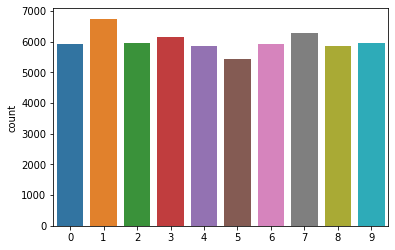

In [6]:
sns.countplot(ytr)
plt.show()

In [0]:
n_pixels=xtr.shape[1]*xtr.shape[2]
def preprocess(img):
  img=img.reshape(n_pixels)
  img=img/255
  return img

In [0]:
xtr=np.array(list(map(preprocess,xtr)))
xts=np.array(list(map(preprocess,xts)))

In [9]:
xtr.shape

(60000, 784)

In [10]:
xts.shape

(10000, 784)

In [0]:
ytr=to_categorical(ytr,10)
yts=to_categorical(yts,10)

In [13]:
model=Sequential()
model.add(Dense(128,input_dim=n_pixels,activation='sigmoid'))
model.add(Dense(256,activation='sigmoid'))
model.add(Dense(512,activation='sigmoid'))
model.add(Dense(n_classes,activation='softmax'))
model.compile(Adam(lr=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 270,218
Trainable params: 270,218
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
h=model.fit(xtr,ytr,epochs=10,verbose=1,validation_data=(xts,yts))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 18s 299us/step - loss: 0.4775 - acc: 0.8542 - val_loss: 0.2461 - val_acc: 0.9274
Epoch 2/10
60000/60000 [==============================] - 8s 131us/step - loss: 0.1888 - acc: 0.9455 - val_loss: 0.2148 - val_acc: 0.9367
Epoch 3/10
60000/60000 [==============================] - 7s 123us/step - loss: 0.1634 - acc: 0.9537 - val_loss: 0.1720 - val_acc: 0.9519
Epoch 4/10
60000/60000 [==============================] - 8s 137us/step - loss: 0.1569 - acc: 0.9559 - val_loss: 0.2046 - val_acc: 0.9455
Epoch 5/10
60000/60000 [==============================] - 8s 127us/step - loss: 0.1455 - acc: 0.9595 - val_loss: 0.1890 - val_acc: 0.9510
Epoch 6/10
60000/60000 [==============================] - 8s 133us/step - loss: 0.1391 - acc: 0.9613 - val_loss: 0.1625 - val_acc: 0.9574
Epoch 7/10
60000/60